- ¿Existe un valor numerico de cuantas lesiones previas hace que el jugador sea mucho mas propenso a lesionarse a futuro?

In [184]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,KFold, cross_val_score
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import confusion_matrix, classification_report

### En este notebook analizaremos los datos para dar una respuesta a la pregunta : ¿Existe un valor numerico de cuantas lesiones previas hace que el jugador sea mucho mas propenso a lesionarse a futuro?

In [6]:
#Importamos los datos limpios
df = pd.read_csv("Datos_limpio.csv")
df.head()

,Age,Height_cm,Weight_kg,Position,Training_Hours_Per_Week,Matches_Played_Past_Season,Previous_Injury_Count,Knee_Strength_Score,Hamstring_Flexibility,Reaction_Time_ms,Balance_Test_Score,Sprint_Speed_10m_s,Agility_Score,Sleep_Hours_Per_Night,Stress_Level_Score,Nutrition_Quality_Score,Warmup_Routine_Adherence,Injury_Next_Season,BMI
0,22,173,64,Midfielder,11.575308,36,1,77.460279,79.115738,284.487853,91.212476,5.874630,77.599705,8.238293,46.616415,81.472206,1,False,21.383942
1,18,170,67,Midfielder,12.275869,37,2,72.634442,82.541688,250.579249,87.294078,5.796269,94.418987,8.983737,49.368037,81.056677,1,False,23.183391
2,22,186,75,Forward,12.254896,12,2,77.064490,75.943631,269.119918,83.440688,5.731209,70.179176,7.229193,43.132808,64.877457,0,True,21.678807
3,20,172,62,Defender,9.006678,11,1,82.810232,73.878324,226.376412,87.591894,6.220212,83.473824,7.681029,51.528529,89.824744,1,False,20.957274
4,18,172,94,Midfielder,12.683668,10,2,76.772859,76.653043,229.021042,83.125161,5.385958,87.037256,6.728091,52.379718,71.569197,0,True,31.773932


In [9]:
###Seleccionamos las variables que nos ayudaran a responder la pregunta   
variables_utiles = df[["Previous_Injury_Count", "Injury_Next_Season"]]
variables_utiles

,Previous_Injury_Count,Injury_Next_Season
0,1,False
1,2,False
2,2,True
3,1,False
4,2,True
...,...,...
795,1,True
796,2,True
797,3,True
798,1,False


## Veremos como se distribuyen nuestros datos

Text(0.5, 1.0, 'BARPLOT- LESIONES PREVIAS')

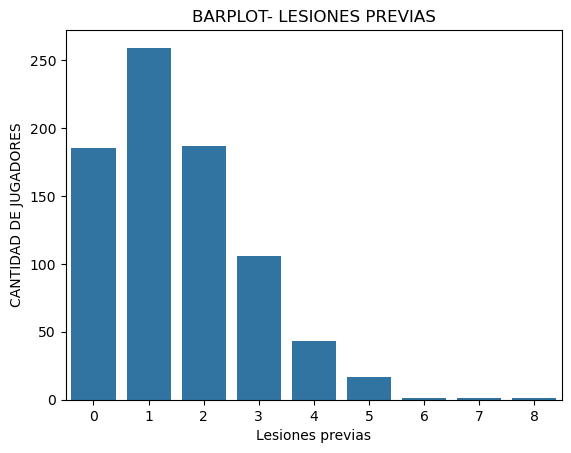

In [25]:
sns.countplot(data=variables_utiles, x = "Previous_Injury_Count")#muestra un conteo  la cantidad de lesiones previas
plt.xlabel("Lesiones previas")
plt.ylabel("CANTIDAD DE JUGADORES")
plt.title("BARPLOT- LESIONES PREVIAS")

In [88]:
df_lesiones = variables_utiles.value_counts().to_frame()
df_lesiones

count
Previous_Injury_Count Injury_Next_Season       
1                     False                 148
0                     False                 138
1                     True                  111
2                     True                  106
                      False                  81
3                     True                   79
0                     True                   47
4                     True                   39
3                     False                  27
5                     True                   15
4                     False                   4
5                     False                   2
6                     True                    1
7                     True                    1
8                     True                    1

#### Reordenamos el df de forma que las lesiones queden organizada por cantidad de lesiones y si se lesiona en la sgte temporada .

In [91]:
df_lesiones = df_lesiones.unstack()# el unstack es el que nos organiza el df
df_lesiones

count       
Injury_Next_Season     False  True 
Previous_Injury_Count              
0                      138.0   47.0
1                      148.0  111.0
2                       81.0  106.0
3                       27.0   79.0
4                        4.0   39.0
5                        2.0   15.0
6                        NaN    1.0
7                        NaN    1.0
8                        NaN    1.0

#### Los valores NaN seran reemplazados por 0,ya que es lo mas logico si despues del agrupamiento no hay valores en esas categorias

In [94]:
df_lesiones = df_lesiones.fillna(0)
df_lesiones


count       
Injury_Next_Season     False  True 
Previous_Injury_Count              
0                      138.0   47.0
1                      148.0  111.0
2                       81.0  106.0
3                       27.0   79.0
4                        4.0   39.0
5                        2.0   15.0
6                        0.0    1.0
7                        0.0    1.0
8                        0.0    1.0

In [96]:
df_lesiones.columns

MultiIndex([('count', False),
            ('count',  True)],
           names=[None, 'Injury_Next_Season'])

Text(0.5, 1.0, 'Lesiones previas de futbolistas que no se lesionaron')

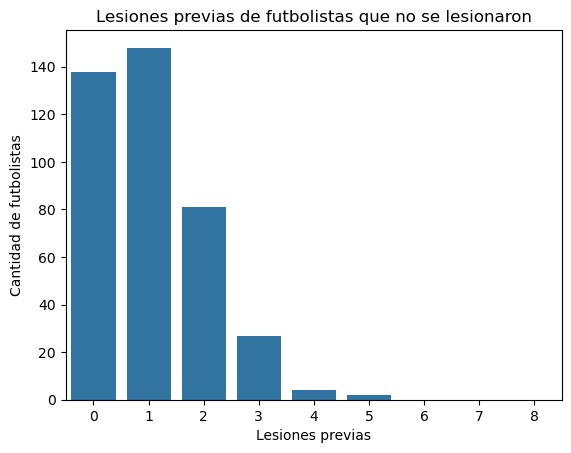

In [104]:
sns.barplot(df_lesiones[('count', False)])
plt.xlabel("Lesiones previas")
plt.ylabel("Cantidad de futbolistas")
plt.title("Lesiones previas de futbolistas que no se lesionaron")

Text(0.5, 1.0, 'Lesiones previas de futbolistas que  se lesionaron')

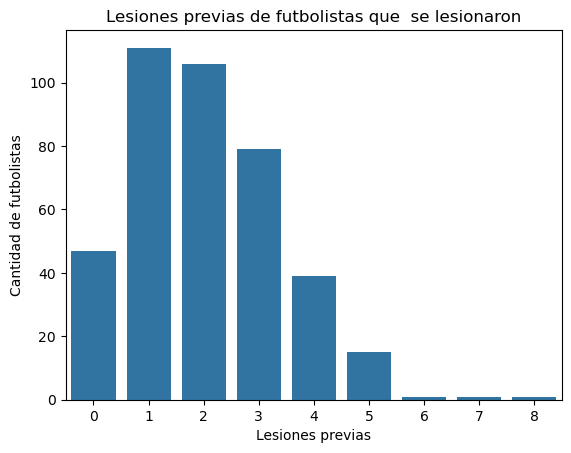

In [106]:
sns.barplot(df_lesiones[('count', True)])
plt.xlabel("Lesiones previas")
plt.ylabel("Cantidad de futbolistas")
plt.title("Lesiones previas de futbolistas que  se lesionaron")

### Ahora compararemos cada par de columnas para ver si podemos encontrar algunn patron en los datos

Text(0.5, 1.0, 'Barplot - comparacion  por lesiones previas')

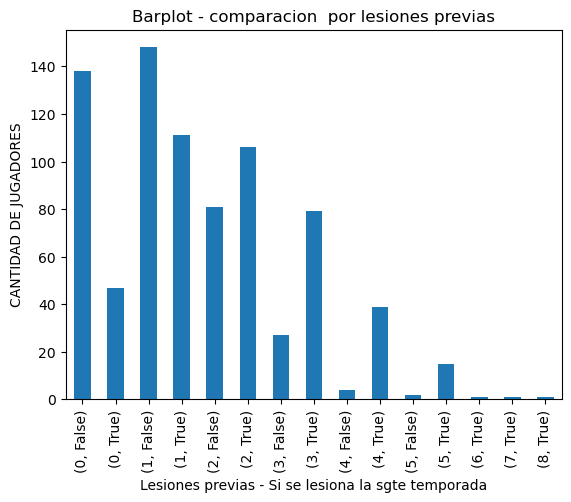

In [59]:
## Vemos cuantos jugadores que tenian 
variables_utiles.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Lesiones previas - Si se lesiona la sgte temporada")
plt.ylabel("CANTIDAD DE JUGADORES")
plt.title("Barplot - comparacion  por lesiones previas")

### Como podemos notar columnas como las de los jugadores que tienen 0 y 1 lesiones previas predominan que hay muchos mas jugadores que no se lesionan la siguiente temporada ,por lo que podemos afirmar que entre ese rango de lesiones previas es mucho mas dificil lesionarse,ya cuando se pasa ese rango podemos notar que es mucho mas probable lesionarse en la siguiente temporada ,esto se puede afirmar ya que si observamos la comparacion desde las 2 lesiones previas siempre predominan en mayoria aquellos que si se lesionan . Por lo que las 2 lesiones generan un punto de quiebre en cuanto a ser mas propenso a lesionarse,pueden existir diferentes causas por las que pueden ocurrir: Sobreesfuerzo despues de la recuperacion,Falta de recuperacion,etc. 

In [124]:
df_lesiones["Total"] = df_lesiones["count", False] + df_lesiones["count", True]
df_lesiones["%lesionados"] = (df_lesiones["count", True] /df_lesiones["Total"])*100
df_lesiones

count         Total %lesionados
Injury_Next_Season     False   True                   
Previous_Injury_Count                                 
0                      138.0   47.0  185.0   25.405405
1                      148.0  111.0  259.0   42.857143
2                       81.0  106.0  187.0   56.684492
3                       27.0   79.0  106.0   74.528302
4                        4.0   39.0   43.0   90.697674
5                        2.0   15.0   17.0   88.235294
6                        0.0    1.0    1.0  100.000000
7                        0.0    1.0    1.0  100.000000
8                        0.0    1.0    1.0  100.000000

Text(0, 0.5, 'Porcentaje de lesion')

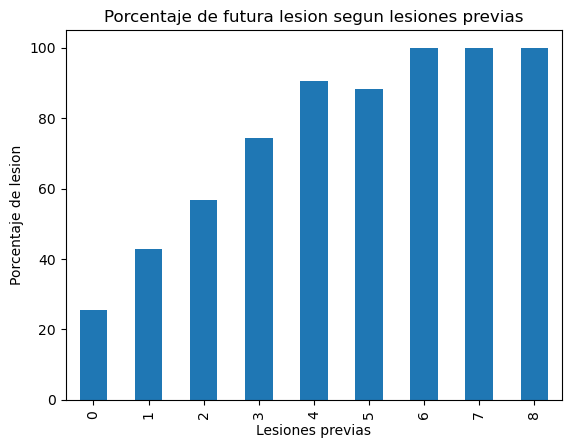

In [145]:
df_lesiones.iloc[:, -1].plot(kind = "bar")
plt.title("Porcentaje de futura lesion segun lesiones previas")
plt.xlabel("Lesiones previas")
plt.ylabel("Porcentaje de lesion")

### Como podemos notar ,desde las 2 lesiones  previas ya la posibilidad que te lesiones esta en tu contra, teniendo un 56% de lesionarse y ya despues aumenta explosivamente ,siendo tan asi ,que en las 3 lesiones ya el porcentaje aumenta a casi un 75% y asi sigue aumentando .

### Ahora se implementaran varios modelos de aprendizaje automatico para ver si es posible que un modelo prediga si un futbolista se lesionara la siguiente temporada de acuerdo a su cantidad de lesiones previas

In [150]:
###Dividimos los datos x e y 
X = df[["Previous_Injury_Count"]]
y = df["Injury_Next_Season"]

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42)

### Ahora evaluaremos 4 modelos de clasificacion para ver cual de ellos nos da el puntaje mas alto para luego entrenarlo y analizar sus predicciones...

### En los siguientes modelos se hará uso de la funcion make_pipeline que lo que hace es que nos ahorramos el escalar los datos,ya que internamente lo realiza,por lo que nos automatiza ese proceso...Veremos tambien si es que afecta el que se escalen los datos 

In [204]:
from sklearn.pipeline import make_pipeline
modelos ={
          "KNN":KNeighborsClassifier(), 
          "Random Forest": RandomForestClassifier(),
          "Tree" :DecisionTreeClassifier(), 
          "REGRESION LOGISTICA":LogisticRegression()            
         }
for nombre, modelo  in modelos.items(): 
    pipeline_=make_pipeline(StandardScaler(), modelo)
    pipeline_.fit(X_train, y_train)
    print(f"{nombre}---->SCORE TRAIN  {pipeline_.score(X_train, y_train)}")
    print(f"{nombre}---->SCORE TEST  {pipeline_.score(X_test, y_test)}")
    validacion_cruzada = cross_val_score(modelo , X, y, cv =6)
    print(f"{nombre} validacion cruzada {validacion_cruzada}")
    print(f"{nombre} desviacion estandar de validacion cruzada {validacion_cruzada.std()}")
    print("-"*30)

KNN---->SCORE TRAIN  0.5816666666666667
KNN---->SCORE TEST  0.585
KNN validacion cruzada [0.60447761 0.48507463 0.53383459 0.61654135 0.59398496 0.59398496]
KNN desviacion estandar de validacion cruzada 0.04657470631168747
------------------------------
Random Forest---->SCORE TRAIN  0.66
Random Forest---->SCORE TEST  0.66
Random Forest validacion cruzada [0.67910448 0.63432836 0.69172932 0.69172932 0.59398496 0.66917293]
Random Forest desviacion estandar de validacion cruzada 0.03530732134181394
------------------------------
Tree---->SCORE TRAIN  0.66
Tree---->SCORE TEST  0.66
Tree validacion cruzada [0.67910448 0.63432836 0.69172932 0.69172932 0.59398496 0.66917293]
Tree desviacion estandar de validacion cruzada 0.03530732134181394
------------------------------
REGRESION LOGISTICA---->SCORE TRAIN  0.66
REGRESION LOGISTICA---->SCORE TEST  0.66
REGRESION LOGISTICA validacion cruzada [0.67910448 0.63432836 0.69172932 0.69172932 0.59398496 0.66917293]
REGRESION LOGISTICA desviacion est

In [206]:
#sin escalar 
for nombre, modelo  in modelos.items(): 
    pipeline_.fit(X_train, y_train)
    print(f"{nombre}---->SCORE TRAIN  {pipeline_.score(X_train, y_train)}")
    print(f"{nombre}---->SCORE TEST  {pipeline_.score(X_test, y_test)}")
    validacion_cruzada = cross_val_score(modelo , X, y, cv =6)
    print(f"{nombre} validacion cruzada {validacion_cruzada}")
    print(f"{nombre} desviacion estandar de validacion cruzada {validacion_cruzada.std()}")
    print("-"*30)

KNN---->SCORE TRAIN  0.66
KNN---->SCORE TEST  0.66
KNN validacion cruzada [0.60447761 0.48507463 0.53383459 0.61654135 0.59398496 0.59398496]
KNN desviacion estandar de validacion cruzada 0.04657470631168747
------------------------------
Random Forest---->SCORE TRAIN  0.66
Random Forest---->SCORE TEST  0.66
Random Forest validacion cruzada [0.67910448 0.63432836 0.69172932 0.69172932 0.59398496 0.66917293]
Random Forest desviacion estandar de validacion cruzada 0.03530732134181394
------------------------------
Tree---->SCORE TRAIN  0.66
Tree---->SCORE TEST  0.66
Tree validacion cruzada [0.67910448 0.63432836 0.69172932 0.69172932 0.59398496 0.66917293]
Tree desviacion estandar de validacion cruzada 0.03530732134181394
------------------------------
REGRESION LOGISTICA---->SCORE TRAIN  0.66
REGRESION LOGISTICA---->SCORE TEST  0.66
REGRESION LOGISTICA validacion cruzada [0.67910448 0.63432836 0.69172932 0.69172932 0.59398496 0.66917293]
REGRESION LOGISTICA desviacion estandar de valida

### Como podemos notar los modelos tienen todos el mismo score tanto en Train como en Score ,pero si nos fijamos,el modelo knn tiene una desviacion estandar mas alta que los demas modelos,por lo que el resultado que nos entrega depende de como se le dividen los datos,en cambio los otros 3 modelos son iguales en todos los aspectos y tienen menor desviacion estandar por lo que no influye como se le dividan los datos.

## Como no deberia afectar el modelo que se elija,usaremos el de Regresion logistica por su interpretabilidad y simpleza

## Ahora con GridSearchCV lo que haremos sera que va a evaluar las diferentes combianciones con los parametros que se le entreguen e internamente realizara una validacion cruzada con el KFold para determinar con que parametros el modelo obtiene el mejor resultado y que resultado obtiene 

In [214]:
modelo_final = LogisticRegression() 
params = {"C": [0.01, 0.001, 1, 10 ,20]}
kfold = KFold(n_splits=6, shuffle=True, random_state=42)
modelo_GSCV = GridSearchCV(modelo_final , params, cv = kfold  )
modelo_GSCV.fit(X, y)
print(modelo_GSCV.best_score_, modelo_GSCV.best_params_)

0.6599614708412823 {'C': 0.01}


### Con lo que nos devuelve GridSearchCV el valor de "C" debe ser 0.01 y el modelo tiene una puntuacion de 0.6599,que correponde a un 66% de acierto

In [232]:
modelo_def = LogisticRegression(C=0.01)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [234]:
modelo_def.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [236]:
modelo_def.score(X_train, y_train)

0.66

In [238]:
modelo_def.score(X_test, y_test)

0.66

<Axes: >

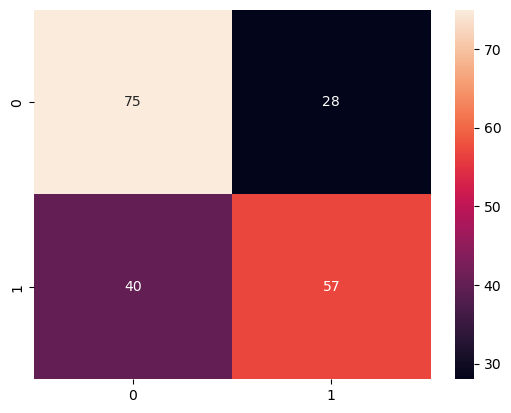

In [246]:
y_pred = modelo_def.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [256]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.65      0.73      0.69       103
        True       0.67      0.59      0.63        97

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.66      0.66      0.66       200



### De las metricas entregadas ,podemos notar que el modelo destaca en acertar el 73% de los casos falsos,es decir ,cuando una persona no se va a lesionar,en cambio su punto debil esta en encontrar los verdaderos positivos,ya que solo acierta el 59% de los casos .

### Para graficar la curva roc AUC me base en el articulo de datacamp : ```https://www.datacamp.com/es/tutorial/understanding-logistic-regression-python``` ,esta curva nos sirve para identintificar que tan bien el modelo clasifica correctamente a los positivos

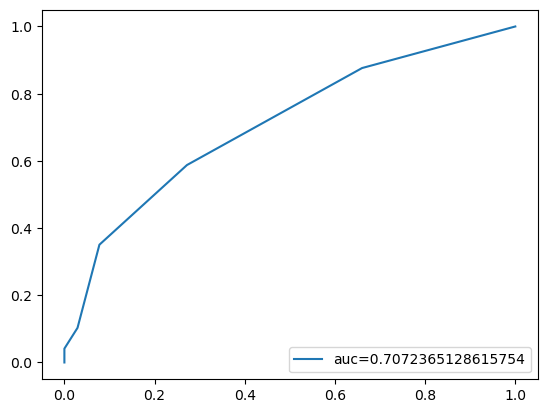

In [263]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = modelo_def.predict_proba(X_test)[::,1]
falso_positivo, verdadero_positivo, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

## El modelo puede fallar debido a que muchos otros parametros tambien influyen en una posible lesion ,como lo pueden ser el nivel de stress ,las horas de sueño,la posicion en la que juega,etc.

## Ademas si nos recordamos de los datos de nuestros datafreame ,en las primeras columnas de lesiones (1 y 2 lesiones) estaba muy equilibrado entre si se lesionaba o no ,ademas entre esas 2 columnas se concentraban mas de la mitad de los datos,por lo que pudo afectar el desempeño del modelo

In [291]:
df_lesiones

count         Total %lesionados
Injury_Next_Season     False   True                   
Previous_Injury_Count                                 
0                      138.0   47.0  185.0   25.405405
1                      148.0  111.0  259.0   42.857143
2                       81.0  106.0  187.0   56.684492
3                       27.0   79.0  106.0   74.528302
4                        4.0   39.0   43.0   90.697674
5                        2.0   15.0   17.0   88.235294
6                        0.0    1.0    1.0  100.000000
7                        0.0    1.0    1.0  100.000000
8                        0.0    1.0    1.0  100.000000